In [2]:
import keras
from keras import layers
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 2000 # word number as feature
max_len = 500       # cut text over these words

(x_train, y_train), (x_test, y_test) =\
    imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

model = keras.models.Sequential()
model.add(layers.Embedding(max_features, 128,
                          input_length=max_len,
                          name='embed'))

model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))
model.summary()
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])
                        


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embed (Embedding)            (None, 500, 128)          256000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 291,937
Trainable params: 291,937
Non-trainable params: 0
_______________________________________________

In [2]:
callbacks = [
    keras.callbacks.TensorBoard(
        log_dir='my_log_dir', # log file is writen into this directory
        histogram_freq=1,     # record activation histogram per epoch
        embeddings_freq=1,    # record embeddgin data per epoch
        # 2020.02.22 add
        embeddings_data=x_train[:100],
    )
]

history = model.fit(x_train, y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2,
                   callbacks=callbacks)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 20000 samples, validate on 5000 samples






Epoch 1/10
20000/20000 [==============================] - 44s 2ms/step - loss: 0.6146 - acc: 0.6643 - val_loss: 0.8438 - val_acc: 0.6610

Epoch 2/10
20000/20000 [==============================] - 43s 2ms/step - loss: 0.4463 - acc: 0.8193 - val_loss: 0.4350 - val_acc: 0.8220
Epoch 3/10
20000/20000 [==============================] - 43s 2ms/step - loss: 0.3672 - acc: 0.8054 - val_loss: 0.4898 - val_acc: 0.7776
Epoch 4/10
20000/20000 [==============================] - 44s 2ms/step - loss: 0.3507 - acc: 0.7592 - val_loss: 0.5075 - val_acc: 0.7486
Epoch 5/10
20000/20000 [==============================] - 43s 2ms/step - loss: 0.2992 - acc: 0.7127 - val_loss: 0.5274 - val_acc: 0.7142
Epoch 6/10
20000/20000 [==============================] - 45s 2ms/step - loss: 0.2411 - acc: 0.7061 - val_loss: 0.6968 - val_acc: 0.6132
Instructions for updating:


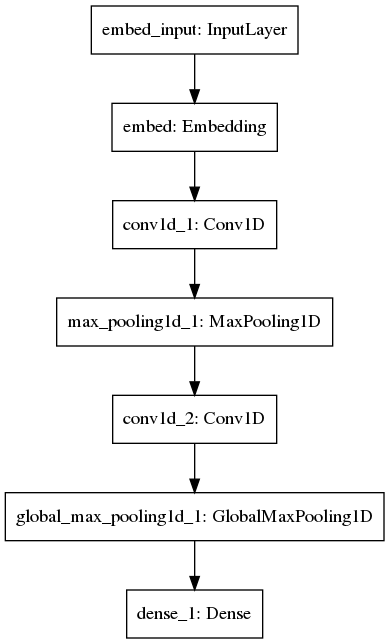

In [3]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

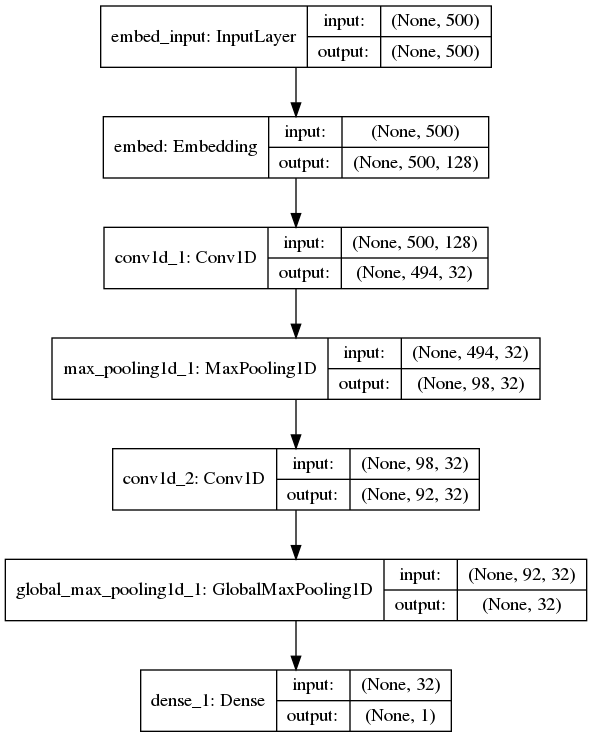

In [4]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='model.png')